In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive/Bertexperiment')
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [ ]:
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
!pip install datasets
import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip3 install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio==0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

!pip3 install sklearn
!pip3 install tqdm
!pip3 install transformers
!pip3 install torch torchvision torchaudio

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.10.2+cu113 (from versions: 1.11.0, 1.11.0+cu113, 1.12.0, 1.12.0+cu113, 1.12.1, 1.12.1+cu113, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1)
ERROR: No matching distribution found for torch==1.10.2+cu113
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf

In [ ]:
batch_size = 8
seq_len = 512

In [ ]:
from transformers import TFAutoModel

roberta= TFAutoModel.from_pretrained('roberta-base')

roberta.summary()

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Model: "tf_roberta_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLaye  multiple                  124645632 
 r)                                                              
                                                                 
Total params: 124645632 (475.49 MB)
Trainable params: 124645632 (475.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')

embeddings = roberta.roberta(input_ids, attention_mask=mask)[1]

x =tf.keras.layers.Dense(1024,activation ='relu')(embeddings)
dropout = tf.keras.layers.Dropout(0.5)(x)
y = tf.keras.layers.Dense(4, activation='softmax',name ='outputs')(dropout)

In [ ]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                                  
 roberta (TFRobertaMainLaye  TFBaseModelOutputWithPooli   1246456   ['input_ids[0][0]',           
 r)                          ngAndCrossAttentions(last_   32         'attention_mask[0][0]']      
                             hidden_state=(None, 512, 7                                       

In [ ]:
import tensorflow as tf
!pip install tensorflow-addons
import tensorflow_addons as tfa

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='AdamW')

loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')
precision = tf.keras.metrics.Precision(name='precision')
recall = tf.keras.metrics.Recall(name='recall')
f1 = tfa.metrics.F1Score(num_classes=4, average='weighted', name='f1_score')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
model.compile(optimizer=optimizer, loss= loss, metrics=[acc, f1, precision, recall])

In [ ]:
batch_size = 8
seq_len = 512

In [ ]:
model.save('/content/drive/My Drive/Bertexperiment/Before-roberta.h5')

In [ ]:
import tensorflow as tf
from tensorflow_addons.metrics import F1Score

# Assuming 'model' is your TensorFlow model
model.save('/content/drive/My Drive/Bertexperiment/Before-roberta')

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/Bertexperiment/Before-roberta')

In [ ]:
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def prep_data(text, seq_len=512):
    tokens = tokenizer.encode_plus(text, max_length=seq_len, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
    return {
        'input_ids': tf.cast(tokens['input_ids'], tf.float64),
        'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)
    }

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
import pandas as pd
test_df = pd.read_csv('/content/drive/My Drive/Bertexperiment/test_imp.csv')

In [ ]:
test_df.head()

,text,label
0,turnover helps colts derail packers peyton man...,1
1,fans await spurrier gators fall successful sie...,1
2,cejka moves contention las vegas european tour...,1
3,coach still fighting mad estrada athens hours ...,1
4,indiana hires hoeppner miami ohios terry hoepp...,1


In [ ]:

num_instances = test_df.shape[0]

print("Number of Instances in Test Set:", num_instances)

Number of Instances in Test Set: 19323


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19323 entries, 0 to 19322
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    19323 non-null  object
 1   label   19323 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 302.0+ KB


In [ ]:
l = list(test_df['text'])
t = list(test_df['label'])

In [ ]:
res=[]
prob_lst=[]
for i in range(len(l)):
  test = prep_data(l[i])
  probs = model.predict(test)
  prob_lst.append(probs)
  test= int(np.argmax(probs))
  res.append(test)
  print(f"{i}/{len(l)}")
print(res)

Streaming output truncated to the last 5000 lines.
16823/19323
1/1 [==============================] - 0s 58ms/step
16824/19323
1/1 [==============================] - 0s 61ms/step
16825/19323
1/1 [==============================] - 0s 57ms/step
16826/19323
1/1 [==============================] - 0s 56ms/step
16827/19323
1/1 [==============================] - 0s 56ms/step
16828/19323
1/1 [==============================] - 0s 62ms/step
16829/19323
1/1 [==============================] - 0s 60ms/step
16830/19323
1/1 [==============================] - 0s 57ms/step
16831/19323
1/1 [==============================] - 0s 57ms/step
16832/19323
1/1 [==============================] - 0s 57ms/step
16833/19323
1/1 [==============================] - 0s 56ms/step
16834/19323
1/1 [==============================] - 0s 60ms/step
16835/19323
1/1 [==============================] - 0s 57ms/step
16836/19323
1/1 [==============================] - 0s 80ms/step
16837/19323
1/1 [==============================] - 0s

In [ ]:
data = {'text': l, 'label': t, 'predictions': res}
df = pd.DataFrame(data)

In [ ]:
pdata = {'probabilities': prob_lst}
ppdf = pd.DataFrame(pdata)

In [ ]:
df

,text,label,predictions
0,turnover helps colts derail packers peyton man...,1,3
1,fans await spurrier gators fall successful sie...,1,3
2,cejka moves contention las vegas european tour...,1,3
3,coach still fighting mad estrada athens hours ...,1,3
4,indiana hires hoeppner miami ohios terry hoepp...,1,3
...,...,...,...
19318,american express weighs lawsuit vs visa master...,2,3
19319,thousands rush home egypt bombings thousands f...,0,3
19320,kyoto wont hit russian economy russian economi...,2,3
19321,cubs sign shortstop chicago chicago cubs come ...,1,3


In [ ]:
df.to_csv('/content/drive/My Drive/Bertexperiment/predictions_preroberta.csv', index=False)
print(df)

                                                    text  label  predictions
0      turnover helps colts derail packers peyton man...      1            3
1      fans await spurrier gators fall successful sie...      1            3
2      cejka moves contention las vegas european tour...      1            3
3      coach still fighting mad estrada athens hours ...      1            3
4      indiana hires hoeppner miami ohios terry hoepp...      1            3
...                                                  ...    ...          ...
19318  american express weighs lawsuit vs visa master...      2            3
19319  thousands rush home egypt bombings thousands f...      0            3
19320  kyoto wont hit russian economy russian economi...      2            3
19321  cubs sign shortstop chicago chicago cubs come ...      1            3
19322  mixed signals sustain rally stocks edged week ...      2            3

[19323 rows x 3 columns]


In [ ]:
ppdf.to_csv('/content/drive/My Drive/Bertexperiment/probs_preroberta.csv', index=False)
print(ppdf)

                                           probabilities
0      [[0.2342915, 0.23692009, 0.24820597, 0.28058246]]
1      [[0.23592365, 0.23499358, 0.2499503, 0.27913246]]
2      [[0.23378994, 0.23793972, 0.24825947, 0.2800109]]
3       [[0.2358861, 0.23597106, 0.2479407, 0.28020212]]
4       [[0.23703197, 0.23434842, 0.24763459, 0.280985]]
...                                                  ...
19318    [[0.23920599, 0.232861, 0.2467359, 0.28119713]]
19319  [[0.2409111, 0.23061194, 0.24868625, 0.27979073]]
19320  [[0.23746236, 0.23530935, 0.25023666, 0.276991...
19321  [[0.23547848, 0.23730011, 0.24656032, 0.2806611]]
19322  [[0.24090847, 0.2361029, 0.24775748, 0.27523112]]

[19323 rows x 1 columns]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example true labels and predicted labels for multiple classes
true_labels = t
predicted_labels = res
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision for each class
precision_per_class = precision_score(true_labels, predicted_labels, average=None)

# Calculate recall for each class
recall_per_class = recall_score(true_labels, predicted_labels, average=None)

# Calculate F1-score for each class
f1_per_class = f1_score(true_labels, predicted_labels, average=None)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-score per class:", f1_per_class)

Accuracy: 0.25
Precision per class: [0.         0.         0.         0.24773586]
Recall per class: [0. 0. 0. 1.]
F1-score per class: [0.         0.         0.         0.39709664]


In [ ]:
prob_lst[0:5]

[array([[0.2342915 , 0.23692009, 0.24820597, 0.28058246]], dtype=float32),
 array([[0.23592365, 0.23499358, 0.2499503 , 0.27913246]], dtype=float32),
 array([[0.23378994, 0.23793972, 0.24825947, 0.2800109 ]], dtype=float32),
 array([[0.2358861 , 0.23597106, 0.2479407 , 0.28020212]], dtype=float32),
 array([[0.23703197, 0.23434842, 0.24763459, 0.280985  ]], dtype=float32)]

In [ ]:
y_pred_prob = np.vstack(prob_lst)

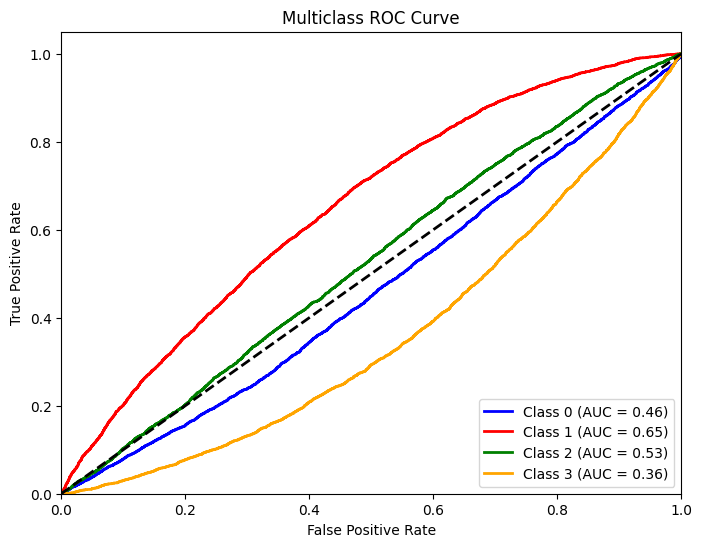

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming y_true contains the true labels for your samples
y_true = t  # replace with your true labels

# Binarize the output
n_classes = y_pred_prob.shape[1]
y_true_binarized = label_binarize(y_true, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()
